In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt

In [42]:
files= [file for file in os.listdir("/content/drive/MyDrive/sales_dataset")]
for file in files:
  print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_November_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_October_2019.csv
Sales_February_2019.csv
Sales_December_2019.csv


In [43]:
# load data from multiple CSV files into one DataFrame
folder_path = "/content/drive/MyDrive/sales_dataset"
all_data = pd.concat([pd.read_csv(os.path.join(folder_path, file))for file in os.listdir(folder_path) if file.endswith(".csv")], ignore_index = True)

In [44]:
# Data Cleaning
all_data.dropna(inplace=True)
all_data = all_data[~all_data['Order Date'].str.startswith('Or')]
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'],errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

<ipython-input-44-ba6f5c37c1fb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-ba6f5c37c1fb>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
# Extract Month, Hour, and Sales Columns
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])
all_data['Month']= all_data['Order Date'].dt.month
all_data['Hour']= all_data['Order Date'].dt.hour
all_data['Sales']= all_data['Quantity Ordered']*all_data['Price Each']

In [46]:
# Q1 What was the best month for sales?

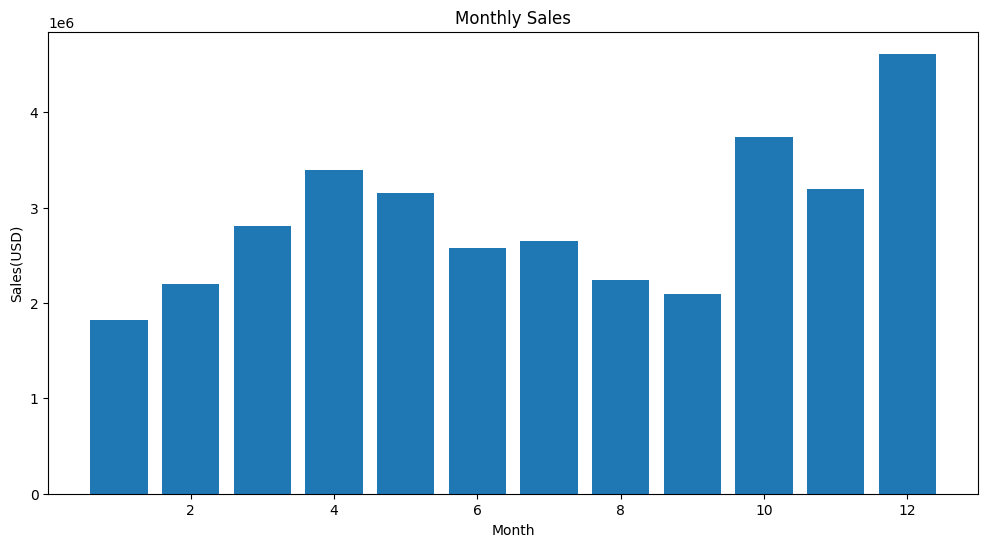

In [47]:
#Monthly Sales
monthly_sales = all_data.groupby('Month')['Sales'].sum()
plt.figure(figsize=(12,6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Sales(USD)')
plt.title('Monthly Sales')
plt.show()

In [48]:
# Result- so according to the analysis december was the best moth of sales

In [49]:
# Q2- Which city sold the most?

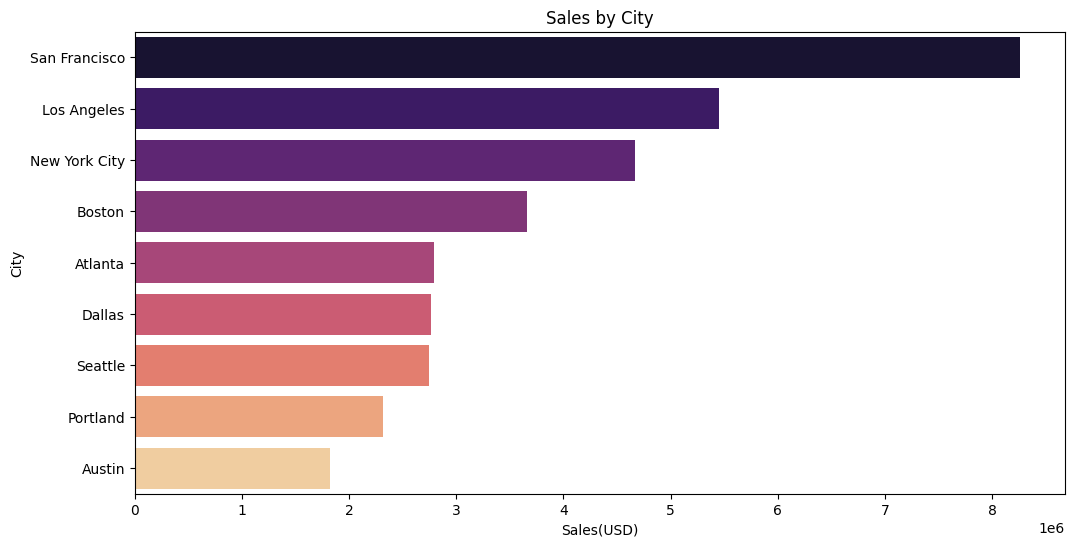

In [53]:
all_data['City']= all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
city_sales = all_data.groupby('City')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=city_sales.values, y=city_sales.index, palette="magma")
plt.xlabel('Sales(USD)')
plt.ylabel('City')
plt.title('Sales by City')
plt.show()

In [54]:
# Result - most products were sold in San Francisco

In [55]:
# Q3 - What time should we display advertisements to maximize the likelihood of customer's buying product?

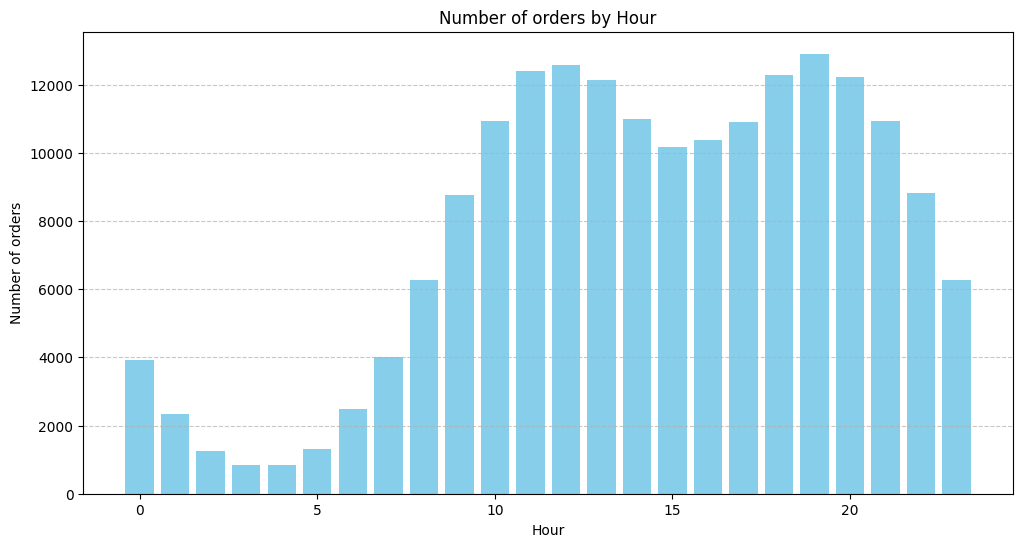

In [57]:
hourly_orders = all_data.groupby('Hour').size()

plt.figure(figsize=(12,6))
plt.bar(hourly_orders.index, hourly_orders.values, color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.title('Number of orders by Hour')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [58]:
# Result- The number of orders peaked from 11am-12noon and 18-19pm hence, the ideal time would be to place ads before 11am and 6pm

In [59]:
# Q4- What products are most often sold together

In [61]:
from itertools import combinations
from collections import Counter

# Find duplicate orders IDs and create a new dataframe with grouped products
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#Drop duplicate rows
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

#Initialize counters for combinations
count_2=Counter()
count_3=Counter()

#Calculate and count combinations of 2 and 3 products
for row in df2['Grouped']:
  row_list = row.split(',')
  count_2.update(Counter(combinations(row_list, 2)))
  count_3.update(Counter(combinations(row_list, 3)))

#Print the most common combinations of 2 products
print("Most common Combination of 2 products:")
for key, value in count_2.most_common(10):
  print(key,value)

#Print the most common combination of 3 products
print("\nMost common combination of 3 products:")
for key, value in count_3.most_common(10):
  print(key,value)

Most common Combination of 2 products:
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92

Most common combination of 3 products:
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24


<ipython-input-61-87f83228c23d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
 #REsults- In pairs, phones and their charging cables were most commonly sold together

In [ ]:
# Q5-What product sold the most? why do you think it sold the most?

<ipython-input-63-3de2e3e75f67>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<function matplotlib.pyplot.show(close=None, block=None)>

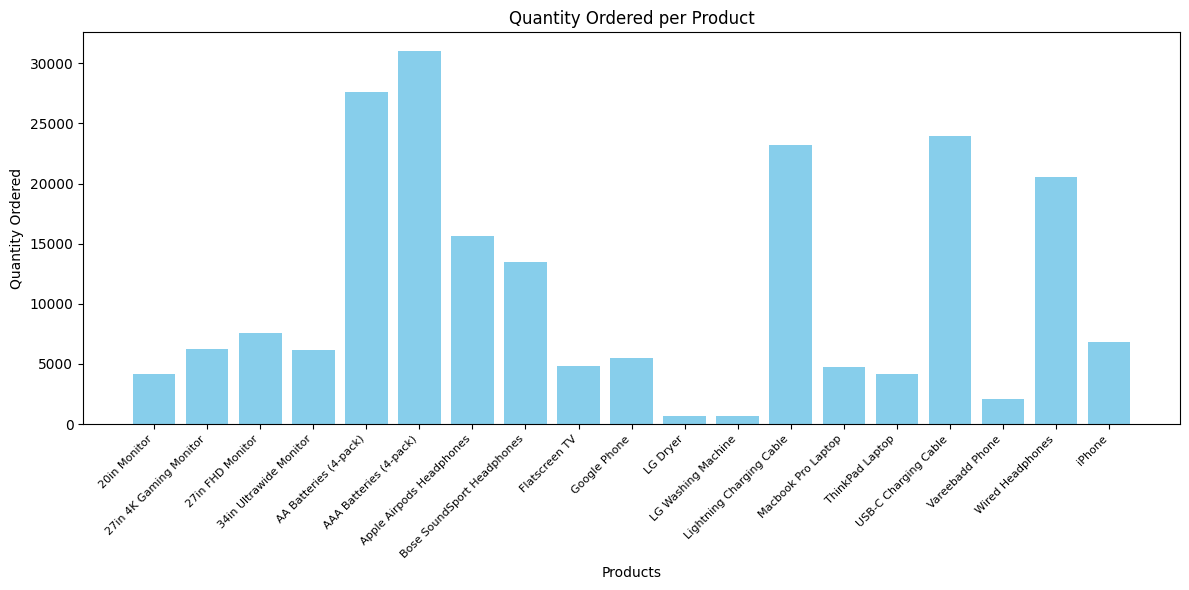

In [63]:
# Group the data by 'Product' and calculate the total quantity ordered for each product
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product,df in product_group]

plt.figure(figsize=(12,6))
plt.bar(products, quantity_ordered, color='skyblue')
plt.xticks(rotation=45, ha='right',fontsize=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered per Product')
plt.tight_layout()
plt.show



In [ ]:
# Result- the batteries and charging cables were the most sold, maybe because they were not expensive